OUTLINE

MODULE 1: Data preprocessing and loading

(a) Obtaining and cleaning the datasets

(b) Twitter specific text pre-processing

(c) Word / sentence vectorisation (as first data input)

Michael: BERT and FastText

(d) Implementing a dictionary approach potentially based on Hatebase.org (as second data input)
(e) Splitting data into test, validation and testing set
(f) Specifying and implementing the data loader
(g) Testing and iterating the module
(h) Creatingmodule-specificvisualisationsforthefinal paper

MODULE 2: Model architecture and training

(a) Choosing width and depth of the model
(b) Choosingoptimizeraswellasactivationandloss functions
(c) Choosing stopping rule, regularisation, dropout, learning rates etc.
(d) Potentially performing a hyperparameter grid search
(e) Running and tracking the training
(f) Training and tuning the model based on the re- sults of the validation set
(g) Creatingmodule-specificvisualisationsforthefi- nal paper

In [0]:
import pandas as pd

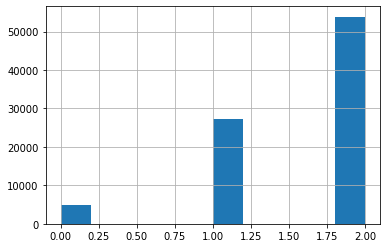

In [0]:
# (a) Obtaining and cleaning the datasets
url_davidson = "https://raw.githubusercontent.com/MaximilianKupi/nlp-project/master/coding/data/twitter%20data/davidson%20et%20al./labeled_data.csv"
url_founta = "https://raw.githubusercontent.com/MaximilianKupi/nlp-project/master/coding/data/twitter%20data/founta%20et%20al./hatespeech_text_label_vote.csv"


data_davidson = pd.read_csv(url_davidson, names=["count", "hate_speech", "offensive_language", "neither", "label", "tweet"], header=1)
data_founta = pd.read_csv(url_founta, sep='\t', names=["tweet", "label_text", "count"])

data_founta = data_founta[~data_founta.label_text.str.contains("spam")]
data_founta['label'] = data_founta.label_text.replace({'hateful': '0', 'abusive': '1', 'normal': '2'}).astype('int')
data_founta.label.hist()

# concatinating and shuffling


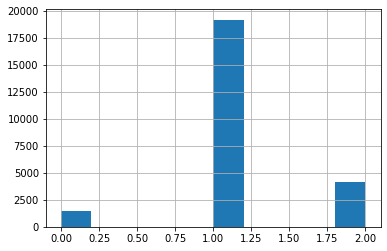

In [0]:
data_davidson.label.hist()

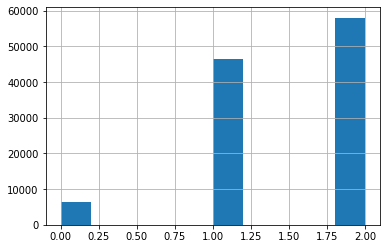

In [3]:
import pandas as pd
df = pd.read_csv("/Users/mxm/Google Drive/Masterstudium/Inhalte/4th Semester/NLP/nlp-project/coding/code/exchange_base/data.csv")
df.label.hist()

In [15]:
# trying to re-import hatebase, somehow doesn't work

'''
import json 
import requests
import pandas as pd
from hatebase import HatebaseAPI

key = open('C:/Users/Niko/Documents/NJS Cloud/1 Uni (non-Google)/0 Hertie/2 Spring 2020/NLP/Hatebase_Key', "r").read() # insert filepath where the API key is stored
filepath = "C:/Users/Niko/Documents/NJS Cloud/1 Uni (non-Google)/0 Hertie/2 Spring 2020/NLP/full_dictionary.csv" # insert filepath where the final csv file should be stored 

hatebase = HatebaseAPI({"key": key})
filters = {"language": "eng"}
format = "json"
# initialize list for all vocabulary entry dictionaries
eng_vocab = []
response = hatebase.getVocabulary(filters=filters, format=format)
pages = response["number_of_pages"]
# fill the vocabulary list with all entries of all pages
# this might take some time...
for page in range(1, pages+1):
    filters["page"] = str(page) 
    response = hatebase.getVocabulary(filters=filters, format=format)
    eng_vocab.append(response["result"])

data = []
for r in eng_vocab:
    data.append(r["data"])
#print len(data)
listofHatewords = []

#print len(data)
for z in data:
    for a, v in z.iteritems():
        for b in v:
            listofHatewords.append(b["vocabulary"])
# print listofHatewords
listofHatewords = list(OrderedDict.fromkeys(listofHatewords))
print(len(listofHatewords))
'''


ModuleNotFoundError: No module named 'hatebase'

In [1]:
import csv
import sys
import pprint
import pandas as pd

#Import Hatebase-Data from CSV-File

def csv_dict_list(variables_file):
    hatebase_dic = csv.DictReader(open("C:/Users/Niko/Documents/GitHub/nlp-project/nlp-project-1/coding/data/dictionary/hatebase/full_dictionary.csv", encoding="utf8"))
    dict_list = []
    for line in hatebase_dic:
        dict_list.append(line)
    return dict_list

listofHatewords = csv_dict_list(sys.argv[1])
#pprint.pprint(listofHatewords)

# Getting Twitter data
input = "https://raw.githubusercontent.com/MaximilianKupi/nlp-project/master/coding/code/exchange_base/data.csv"
data = pd.read_csv(input)


   ('is_about_gender', 'False'),
              ('is_about_sexual_orientation', 'False'),
              ('is_about_disability', 'False'),
              ('is_about_class', 'False'),
              ('number_of_sightings', '0'),
              ('number_of_sightings_this_year', '0'),
              ('number_of_sightings_this_month', '0'),
              ('created_on', '-0001-11-30 05:00:00'),
              ('updated_on', '-0001-11-30 05:00:00')]),
 OrderedDict([('', '1514'),
              ('vocabulary_id', 'h64JZxPYH'),
              ('term', 'frog'),
              ('hateful_meaning',
               'A French person. Prior to 19th century, referred to the Dutch '
               '(as they were stereotyped as being marsh-dwellers). When '
               "France became Britain's main enemy, replacing the Dutch, the "
               'epithet transferred to them, due to the French recipe for '
               "eating frogs' legs (see comparable French term Rosbif). Also "
               'used in Cana

In [10]:
'''
# Finding different forms of the (hate words)

import nltk
#nltk.download('wordnet')
from nltk.corpus import wordnet as wn
# Storing the derivational forms in a set to eliminate duplicates
index2 = 0
for word in listofHatewords:
    forms = set()
    for any_lemma in wn.lemmas(word): #for any lemma in WordNet
        forms.add(any_lemma.name()) #add the lemma itself
        for related_lemma in any_lemma.derivationally_related_forms(): #for each related lemma
            forms.add(related_lemma.name()) #add the related lemma
        versionsOfWord[index2] = forms
    index2 += 1
print(len(versionsOfWord))
'''

NameError: name 'versionsOfWord' is not defined

In [12]:
# Defining lists for the tensor later

frequency = []
listofHatewords = []
#frequencyID = []
listmessageID = []
frequencyIndex = []
for x in range(1600):
    frequency.append(0)
for x in range(1600):
    listmessageID.append([])
for x in range(1600):
    frequencyIndex.append([])

"""
for x in range(0, 1000):
    frequencyID.append([])
    
for x in range(10000):
    versionsOfWord.append([])
"""

'\nfor x in range(0, 1000):\n    frequencyID.append([])\n    \nfor x in range(10000):\n    versionsOfWord.append([])\n'

In [6]:
# Getting the data


totalNumberofWords = 0
counter = 0
for t in data['tweet']:
    totalNumberofWords += len(t)
    index = 0
    
    if counter%1600==0:
        print(counter)
    #print counter
    #Need to tokenize to get all frequencies
    for word in listofHatewords:
        #wordLowered = word.lower()
        #listof_lower = lower.split(" ")
        #similarWords = versionsOfWord[index]

        if word in listofHatewords or len(difflib.get_close_matches(word, listofHatewords, 1, .75)) >= 1:
            frequency[index]+=1
            frequencyIndex[index].append(counter)
            #frequencyID[index].append(str(m_id) + " " + m)
        #elif len(similarWords) > 0:
            #found = False
            for a in similarWords:
                aLowered = a.lower()
                if aLowered in listof_lower or len(difflib.get_close_matches(aLowered, listof_lower, 1, .75)) >= 1:
                    #found = True
                    frequency[index]+=1
                    frequencyIndex[index].append(counter)
                    #print "test" + str(counter)
                    break 
        #Increase index to make sense
        if index >= len(listofHatewords):
            print("Length error")
        
        index+=1
    counter += 1

0
1600
3200
4800
6400
8000
9600
11200
12800
14400
16000
17600
19200
20800
22400
24000
25600
27200
28800
30400
32000
33600
35200
36800
38400
40000
41600
43200
44800
46400
48000
49600
51200
52800
54400
56000
57600
59200
60800
62400
64000
65600
67200
68800
70400
72000
73600
75200
76800
78400
80000
81600
83200
84800
86400
88000
89600
91200
92800
94400
96000
97600
99200
100800
102400
104000
105600
107200
108800
110400


In [ ]:
#Process data
jsonList = []

for i in range(0,10000):
    jsonList.append({'hateword': listofHatewords[i], 'frequency': frequency[i]})
    
#print(json.dumps(jsonList, indent = 1))

#Put to file
import simplejson
import time
timestr = time.strftime("%Y%m%d-%H%M%S")
try:
    f = open(ChannelName + 'Allfrequencies'  + str(timestr) +'.json', 'w')
    simplejson.dump(jsonList, f)
    f.close()
except NameError:
    print "Almost erased" + ChannelName + "Allfrequencies.json! Be careful!!!"


In [ ]:
#print totalNumberofWords
#print frequency

#TODO percentages + save list of hate words into file for further analysis{
 "cells": [
  {
   "cell_type": "markdown",
   "metadata": {
    "colab_type": "text",
    "id": "YEJLyN8ARwG0"
   },
   "source": [
    "OUTLINE\n",
    "\n",
    "MODULE 1: Data preprocessing and loading\n",
    "\n",
    "(a) Obtaining and cleaning the datasets\n",
    "\n",
    "(b) Twitter specific text pre-processing\n",
    "\n",
    "(c) Word / sentence vectorisation (as first data input)\n",
    "\n",
    "Michael: BERT and FastText\n",
    "\n",
    "(d) Implementing a dictionary approach potentially based on Hatebase.org (as second data input)\n",
    "(e) Splitting data into test, validation and testing set\n",
    "(f) Specifying and implementing the data loader\n",
    "(g) Testing and iterating the module\n",
    "(h) Creatingmodule-specificvisualisationsforthefinal paper\n",
    "\n",
    "MODULE 2: Model architecture and training\n",
    "\n",
    "(a) Choosing width and depth of the model\n",
    "(b) Choosingoptimizeraswellasactivationandloss functions\n",
    "(c) Choosing stopping rule, regularisation, dropout, learning rates etc.\n",
    "(d) Potentially performing a hyperparameter grid search\n",
    "(e) Running and tracking the training\n",
    "(f) Training and tuning the model based on the re- sults of the validation set\n",
    "(g) Creatingmodule-specificvisualisationsforthefi- nal paper"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 0,
   "metadata": {
    "colab": {},
    "colab_type": "code",
    "id": "dv1umYnh3FPm"
   },
   "outputs": [],
   "source": [
    "import pandas as pd"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 0,
   "metadata": {
    "colab": {
     "base_uri": "https://localhost:8080/",
     "height": 282
    },
    "colab_type": "code",
    "executionInfo": {
     "elapsed": 1917,
     "status": "ok",
     "timestamp": 1584010359358,
     "user": {
      "displayName": "Maximilian Kupi",
      "photoUrl": "",
      "userId": "17277613217804122571"
     },
     "user_tz": -60
    },
    "id": "q9VlRlNURsde",
    "outputId": "17662880-c497-4ebf-88c3-a2e978b495a9"
   },
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<matplotlib.axes._subplots.AxesSubplot at 0x7fb6f7e7e1d0>"
      ]
     },
     "execution_count": 29,
     "metadata": {
      "tags": []
     },
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAYMAAAD4CAYAAAAO9oqkAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz\nAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0\ndHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAUWklEQVR4nO3dfZBd9X3f8fcnwjxE2CBCsmUQtfBY\nMx5h1zbsAHHcdmUSWHAS0WnigXGDcBWrqaHjTD2t5XpaUj9M8XRSUlLHHY3RIFLHMiFxUQ2UqMCO\np/WIJxsjHoJZyzigIdAgWWTtBFeeb/+4P9kHzUp772rv3QXer5k7e+73/M653/vbq/3suefsVaoK\nSdJr208tdgOSpMVnGEiSDANJkmEgScIwkCQBxyx2A/N16qmn1qpVq+a17fe//32WL1++sA0tAPsa\njH0Nxr4G82rs68EHH/yrqvrZWVdW1Svyds4559R83XPPPfPedpjsazD2NRj7GsyrsS/ggTrMz1Tf\nJpIkGQaSJMNAkoRhIEnCMJAkYRhIkjAMJEkYBpIkDANJEq/gj6OQpMW0atNti/K4N04O5yMyPDKQ\nJBkGkiTDQJKEYSBJwjCQJGEYSJIwDCRJGAaSJAwDSRKGgSSJPsMgyVNJdiV5KMkDrXZKkh1Jnmxf\nV7R6klyfZDrJw0nO7uxnfRv/ZJL1nfo5bf/Tbdss9BOVJB3eIEcGa6vqHVU13u5vAu6qqtXAXe0+\nwMXA6nbbCHwOeuEBXAOcB5wLXHMwQNqYD3a2m5z3M5IkDexo3iZaB2xty1uBSzv1m6pnJ3ByktOA\ni4AdVbW3qvYBO4DJtu4NVbWzqgq4qbMvSdII9BsGBfxZkgeTbGy1sap6ti3/JTDWlk8Hnu5s+0yr\nHan+zCx1SdKI9PsR1u+uqj1Jfg7YkeTPuyurqpLUwrf3ci2INgKMjY0xNTU1r/3MzMzMe9thsq/B\n2Ndg7Gswc/X1kbcdGF0zHcOar77CoKr2tK/PJ/kyvff8n0tyWlU9297qeb4N3wOc0dl8ZavtASYO\nqU+1+spZxs/Wx2ZgM8D4+HhNTEzMNmxOU1NTzHfbYbKvwdjXYOxrMHP1deUi/n8Gw5ivOd8mSrI8\nyesPLgMXAo8A24GDVwStB25ty9uBK9pVRecD+9vbSXcCFyZZ0U4cXwjc2da9mOT8dhXRFZ19SZJG\noJ8jgzHgy+1qz2OAP6qq/5nkfuDmJBuA7wLva+NvBy4BpoEfAB8AqKq9ST4J3N/GfaKq9rblDwE3\nAicAd7SbJGlE5gyDqtoNvH2W+gvABbPUC7jqMPvaAmyZpf4A8NY++pUkDYF/gSxJMgwkSYaBJAnD\nQJKEYSBJwjCQJGEYSJIwDCRJGAaSJAwDSRKGgSQJw0CShGEgScIwkCRhGEiSMAwkSRgGkiQMA0kS\nhoEkCcNAkoRhIEnCMJAkYRhIkjAMJEkYBpIkDANJEoaBJAnDQJKEYSBJwjCQJDFAGCRZluQbSb7S\n7p+Z5N4k00m+lOTYVj+u3Z9u61d19vGxVn8iyUWd+mSrTSfZtHBPT5LUj0GODD4MPN65/xnguqp6\nM7AP2NDqG4B9rX5dG0eSNcBlwFnAJPAHLWCWAZ8FLgbWAJe3sZKkEekrDJKsBN4LfL7dD/Ae4JY2\nZCtwaVte1+7T1l/Qxq8DtlXVS1X1HWAaOLfdpqtqd1X9ENjWxkqSRuSYPsf9HvCvgde3+z8DfK+q\nDrT7zwCnt+XTgacBqupAkv1t/OnAzs4+u9s8fUj9vNmaSLIR2AgwNjbG1NRUn+2/3MzMzLy3HSb7\nGox9Dca+BjNXXx9524HDrhumYc3XnGGQ5JeB56vqwSQTC97BAKpqM7AZYHx8vCYm5tfO1NQU8912\nmOxrMPY1GPsazFx9XbnpttE103Hj5PKhzFc/Rwa/APxqkkuA44E3AP8ZODnJMe3oYCWwp43fA5wB\nPJPkGOAk4IVO/aDuNoerS5JGYM5zBlX1sapaWVWr6J0Avruq3g/cA/xaG7YeuLUtb2/3aevvrqpq\n9cva1UZnAquB+4D7gdXt6qRj22NsX5BnJ0nqS7/nDGbzUWBbkk8B3wBuaPUbgD9MMg3spffDnap6\nNMnNwGPAAeCqqvoRQJKrgTuBZcCWqnr0KPqSJA1ooDCoqilgqi3vpncl0KFj/hb49cNs/2ng07PU\nbwduH6QXSdLC8S+QJUmGgSTJMJAkYRhIkjAMJEkYBpIkDANJEoaBJAnDQJKEYSBJwjCQJGEYSJIw\nDCRJGAaSJAwDSRKGgSQJw0CShGEgScIwkCRhGEiSMAwkSRgGkiQMA0kShoEkCcNAkoRhIEnCMJAk\nYRhIkjAMJEn0EQZJjk9yX5JvJnk0yb9v9TOT3JtkOsmXkhzb6se1+9Nt/arOvj7W6k8kuahTn2y1\n6SSbFv5pSpKOpJ8jg5eA91TV24F3AJNJzgc+A1xXVW8G9gEb2vgNwL5Wv66NI8ka4DLgLGAS+IMk\ny5IsAz4LXAysAS5vYyVJIzJnGFTPTLv7unYr4D3ALa2+Fbi0La9r92nrL0iSVt9WVS9V1XeAaeDc\ndpuuqt1V9UNgWxsrSRqRVNXcg3q/vT8IvJneb/H/EdjZfvsnyRnAHVX11iSPAJNV9Uxb923gPOB3\n2jb/rdVvAO5oDzFZVb/Z6r8BnFdVV8/Sx0ZgI8DY2Ng527Ztm9eTnpmZ4cQTT5zXtsNkX4Oxr8HY\n12Dm6mvXnv0j7OYnzjxp2bzna+3atQ9W1fhs647pZwdV9SPgHUlOBr4MvGVenRylqtoMbAYYHx+v\niYmJee1namqK+W47TPY1GPsajH0NZq6+rtx02+ia6bhxcvlQ5mugq4mq6nvAPcDPAycnORgmK4E9\nbXkPcAZAW38S8EK3fsg2h6tLkkakn6uJfrYdEZDkBOCXgMfphcKvtWHrgVvb8vZ2n7b+7uq9F7Ud\nuKxdbXQmsBq4D7gfWN2uTjqW3knm7Qvx5CRJ/ennbaLTgK3tvMFPATdX1VeSPAZsS/Ip4BvADW38\nDcAfJpkG9tL74U5VPZrkZuAx4ABwVXv7iSRXA3cCy4AtVfXogj1DSdKc5gyDqnoYeOcs9d30rgQ6\ntP63wK8fZl+fBj49S/124PY++pUkDYF/gSxJMgwkSYaBJAnDQJKEYSBJos+/QJbUv1179i/KX6c+\nde17R/6YevXwyECSZBhIkgwDSRKGgSQJw0CShGEgScIwkCRhGEiSMAwkSRgGkiQMA0kShoEkCcNA\nkoRhIEnCMJAkYRhIkjAMJEkYBpIkDANJEoaBJAnDQJKEYSBJwjCQJGEYSJLoIwySnJHkniSPJXk0\nyYdb/ZQkO5I82b6uaPUkuT7JdJKHk5zd2df6Nv7JJOs79XOS7GrbXJ8kw3iykqTZ9XNkcAD4SFWt\nAc4HrkqyBtgE3FVVq4G72n2Ai4HV7bYR+Bz0wgO4BjgPOBe45mCAtDEf7Gw3efRPTZLUrznDoKqe\nraqvt+W/Bh4HTgfWAVvbsK3ApW15HXBT9ewETk5yGnARsKOq9lbVPmAHMNnWvaGqdlZVATd19iVJ\nGoH0fv72OThZBXwVeCvwF1V1cqsH2FdVJyf5CnBtVf3vtu4u4KPABHB8VX2q1f8t8DfAVBv/i63+\n94GPVtUvz/L4G+kdbTA2NnbOtm3bBn/GwMzMDCeeeOK8th0m+xrMUu3r+b37ee5vRv+4bzv9pCOu\nX6rz9Urta9ee/SPs5ifOPGnZvOdr7dq1D1bV+Gzrjul3J0lOBP4E+O2qerH7tn5VVZL+U2Weqmoz\nsBlgfHy8JiYm5rWfqakp5rvtMNnXYJZqX7//hVv53V19/9NaME+9f+KI65fqfL1S+7py022ja6bj\nxsnlQ5mvvq4mSvI6ekHwhar601Z+rr3FQ/v6fKvvAc7obL6y1Y5UXzlLXZI0Iv1cTRTgBuDxqvpP\nnVXbgYNXBK0Hbu3Ur2hXFZ0P7K+qZ4E7gQuTrGgnji8E7mzrXkxyfnusKzr7kiSNQD/Hsr8A/Aaw\nK8lDrfZvgGuBm5NsAL4LvK+tux24BJgGfgB8AKCq9ib5JHB/G/eJqtrblj8E3AicANzRbpKkEZkz\nDNqJ4MNd93/BLOMLuOow+9oCbJml/gC9k9KSpEXgXyBLkgwDSZJhIEnCMJAkYRhIkjAMJEkYBpIk\nDANJEoaBJAnDQJKEYSBJwjCQJGEYSJIwDCRJGAaSJAwDSRKGgSQJw0CShGEgScIwkCRhGEiSMAwk\nSRgGkiQMA0kShoEkCcNAkoRhIEnCMJAkYRhIkugjDJJsSfJ8kkc6tVOS7EjyZPu6otWT5Pok00ke\nTnJ2Z5v1bfyTSdZ36uck2dW2uT5JFvpJSpKOrJ8jgxuByUNqm4C7qmo1cFe7D3AxsLrdNgKfg154\nANcA5wHnAtccDJA25oOd7Q59LEnSkM0ZBlX1VWDvIeV1wNa2vBW4tFO/qXp2AicnOQ24CNhRVXur\nah+wA5hs695QVTurqoCbOvuSJI3IMfPcbqyqnm3LfwmMteXTgac7455ptSPVn5mlPqskG+kdcTA2\nNsbU1NS8mp+ZmZn3tsNkX4NZqn2NnQAfeduBkT/uXHOxVOfrldrXYnyPYXjzNd8w+LGqqiS1EM30\n8Vibgc0A4+PjNTExMa/9TE1NMd9th8m+BrNU+/r9L9zK7+466n9aA3vq/RNHXL9U5+uV2teVm24b\nXTMdN04uH8p8zfdqoufaWzy0r8+3+h7gjM64la12pPrKWeqSpBGabxhsBw5eEbQeuLVTv6JdVXQ+\nsL+9nXQncGGSFe3E8YXAnW3di0nOb1cRXdHZlyRpROY8lk3yRWACODXJM/SuCroWuDnJBuC7wPva\n8NuBS4Bp4AfABwCqam+STwL3t3GfqKqDJ6U/RO+KpROAO9pNkjRCc4ZBVV1+mFUXzDK2gKsOs58t\nwJZZ6g8Ab52rD0nS8PgXyJIkw0CSZBhIkjAMJEkYBpIkDANJEoaBJAnDQJKEYSBJwjCQJGEYSJIw\nDCRJGAaSJAwDSRIL8N9evhLt2rN/Uf7Luqeufe/IH1OS+uGRgSTJMJAkGQaSJAwDSRKGgSQJw0CS\nhGEgScIwkCRhGEiSMAwkSRgGkiQMA0kShoEkCcNAkoRhIEliCYVBkskkTySZTrJpsfuRpNeSJREG\nSZYBnwUuBtYAlydZs7hdSdJrx5IIA+BcYLqqdlfVD4FtwLpF7kmSXjOWyn97eTrwdOf+M8B5hw5K\nshHY2O7OJHlino93KvBX89x23vKZOYcsSl99sK/B+PoajH0NYO1njqqvNx5uxVIJg75U1WZg89Hu\nJ8kDVTW+AC0tKPsajH0Nxr4G81rra6m8TbQHOKNzf2WrSZJGYKmEwf3A6iRnJjkWuAzYvsg9SdJr\nxpJ4m6iqDiS5GrgTWAZsqapHh/iQR/1W05DY12DsazD2NZjXVF+pqmHsV5L0CrJU3iaSJC0iw0CS\n9OoKg7k+0iLJcUm+1Nbfm2RVZ93HWv2JJBeNuK9/meSxJA8nuSvJGzvrfpTkoXZb0JPqffR1ZZL/\n23n83+ysW5/kyXZbP+K+ruv09K0k3+usG+Z8bUnyfJJHDrM+Sa5vfT+c5OzOumHO11x9vb/1syvJ\n15K8vbPuqVZ/KMkDI+5rIsn+zvfr33XWDe3jafro6191enqkvaZOaeuGOV9nJLmn/Sx4NMmHZxkz\nvNdYVb0qbvROPH8beBNwLPBNYM0hYz4E/Ne2fBnwpba8po0/Djiz7WfZCPtaC/x0W/7nB/tq92cW\ncb6uBP7LLNueAuxuX1e05RWj6uuQ8f+C3gUHQ52vtu9/AJwNPHKY9ZcAdwABzgfuHfZ89dnXuw4+\nHr2PfLm3s+4p4NRFmq8J4CtH+xpY6L4OGfsrwN0jmq/TgLPb8uuBb83yb3Jor7FX05FBPx9psQ7Y\n2pZvAS5IklbfVlUvVdV3gOm2v5H0VVX3VNUP2t2d9P7OYtiO5iNALgJ2VNXeqtoH7AAmF6mvy4Ev\nLtBjH1FVfRXYe4Qh64CbqmcncHKS0xjufM3ZV1V9rT0ujO711c98Hc5QP55mwL5G+fp6tqq+3pb/\nGnic3qczdA3tNfZqCoPZPtLi0In88ZiqOgDsB36mz22H2VfXBnrJf9DxSR5IsjPJpQvU0yB9/eN2\nOHpLkoN/GLgk5qu9nXYmcHenPKz56sfheh/mfA3q0NdXAX+W5MH0Pu5l1H4+yTeT3JHkrFZbEvOV\n5Kfp/UD9k055JPOV3lvY7wTuPWTV0F5jS+LvDNST5J8A48A/7JTfWFV7krwJuDvJrqr69oha+h/A\nF6vqpST/jN5R1XtG9Nj9uAy4pap+1Kkt5nwtaUnW0guDd3fK727z9XPAjiR/3n5zHoWv0/t+zSS5\nBPjvwOoRPXY/fgX4P1XVPYoY+nwlOZFeAP12Vb24kPs+klfTkUE/H2nx4zFJjgFOAl7oc9th9kWS\nXwQ+DvxqVb10sF5Ve9rX3cAUvd8WRtJXVb3Q6eXzwDn9bjvMvjou45BD+CHOVz8O1/uif9xKkr9H\n73u4rqpeOFjvzNfzwJdZuLdH51RVL1bVTFu+HXhdklNZAvPVHOn1NZT5SvI6ekHwhar601mGDO81\nNowTIYtxo3eUs5ve2wYHTzqddciYq3j5CeSb2/JZvPwE8m4W7gRyP329k94Js9WH1FcAx7XlU4En\nWaATaX32dVpn+R8BO+snJ6u+0/pb0ZZPGVVfbdxb6J3Myyjmq/MYqzj8CdH38vKTe/cNe7767Ovv\n0jsP9q5D6suB13eWvwZMjrCvv3Pw+0fvh+pftLnr6zUwrL7a+pPonVdYPqr5as/9JuD3jjBmaK+x\nBZvcpXCjd6b9W/R+sH681T5B77dtgOOBP27/MO4D3tTZ9uNtuyeAi0fc1/8CngMearftrf4uYFf7\nx7AL2DDivv4D8Gh7/HuAt3S2/adtHqeBD4yyr3b/d4BrD9lu2PP1ReBZ4P/Re092A/BbwG+19aH3\nnzR9uz3++Ijma66+Pg/s67y+Hmj1N7W5+mb7Pn98xH1d3Xl97aQTVrO9BkbVVxtzJb2LSrrbDXu+\n3k3vnMTDne/VJaN6jflxFJKkV9U5A0nSPBkGkiTDQJJkGEiSMAwkSRgGkiQMA0kS8P8BdMHOq4Eb\nv1QAAAAASUVORK5CYII=\n",
      "text/plain": [
       "<Figure size 432x288 with 1 Axes>"
      ]
     },
     "metadata": {
      "tags": []
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "# (a) Obtaining and cleaning the datasets\n",
    "url_davidson = \"https://raw.githubusercontent.com/MaximilianKupi/nlp-project/master/coding/data/twitter%20data/davidson%20et%20al./labeled_data.csv\"\n",
    "url_founta = \"https://raw.githubusercontent.com/MaximilianKupi/nlp-project/master/coding/data/twitter%20data/founta%20et%20al./hatespeech_text_label_vote.csv\"\n",
    "\n",
    "\n",
    "data_davidson = pd.read_csv(url_davidson, names=[\"count\", \"hate_speech\", \"offensive_language\", \"neither\", \"label\", \"tweet\"], header=1)\n",
    "data_founta = pd.read_csv(url_founta, sep='\\t', names=[\"tweet\", \"label_text\", \"count\"])\n",
    "\n",
    "data_founta = data_founta[~data_founta.label_text.str.contains(\"spam\")]\n",
    "data_founta['label'] = data_founta.label_text.replace({'hateful': '0', 'abusive': '1', 'normal': '2'}).astype('int')\n",
    "data_founta.label.hist()\n",
    "\n",
    "# concatinating and shuffling\n"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 0,
   "metadata": {
    "colab": {
     "base_uri": "https://localhost:8080/",
     "height": 285
    },
    "colab_type": "code",
    "executionInfo": {
     "elapsed": 494,
     "status": "ok",
     "timestamp": 1584010091294,
     "user": {
      "displayName": "Maximilian Kupi",
      "photoUrl": "",
      "userId": "17277613217804122571"
     },
     "user_tz": -60
    },
    "id": "cptbu8RwTnaq",
    "outputId": "eb402d35-1beb-44ec-b6fe-e6b7f9f8dd19"
   },
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<matplotlib.axes._subplots.AxesSubplot at 0x7fb6f920f400>"
      ]
     },
     "execution_count": 27,
     "metadata": {
      "tags": []
     },
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAYMAAAD7CAYAAACIYvgKAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz\nAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0\ndHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAaDklEQVR4nO3df5DU9Z3n8efrMLKukyiGbN8scAFr\nJ7sFuktkSrlszPWsiY4ku5i9Kw/KVVSSiadcJbWpu+BadVp61pHbdXOlyZmQSAkVzomnMXAuLCGE\njrWbRYGEMKASBsRz5hBOx2AmWuzive+P/kzyddI90z+me1p4Paq65tvvz+fz/b77Mw3v7u/n2z2K\nCMzM7Mz2zyY7ATMzm3wuBmZm5mJgZmYuBmZmhouBmZnhYmBmZlRQDCTNkrRd0rOS9kv6bIpfIGmr\npIPp57QUl6T7JfVL2ivpksy+lqX+ByUty8QXSOpLY+6XpEY8WDMzK62SdwangM9HxFxgIXCbpLnA\nSmBbRHQA29J9gKuBjnTrAR6EYvEA7gQuAy4F7hwpIKnPpzPjuut/aGZmVqmzxusQEUeBo2n755Ke\nA2YAi4F86rYWKABfSPF1Ufw02w5J50tqT323RsQQgKStQLekAvCeiNiR4uuAa4DNY+U1ffr0mD17\ndhUP9Vd+8YtfcO6559Y0tpGcV3WcV3WcV3VO17x27979SkS8b3R83GKQJWk28EHgaSCXCgXAy0Au\nbc8AXsoMG0ixseIDJeJjmj17Nrt27aom/V8qFArk8/maxjaS86qO86qO86rO6ZqXpBdLxSsuBpLa\ngMeBz0XE69nT+hERkhr+vRaSeiieeiKXy1EoFGraz/DwcM1jG8l5Vcd5Vcd5VeeMyysixr0B7wK2\nAH+eiR0A2tN2O3AgbX8NWDq6H7AU+Fom/rUUaweez8Tf1q/cbcGCBVGr7du31zy2kZxXdZxXdZxX\ndU7XvIBdUeL/1EquJhLwEPBcRPx1pmkjMHJF0DJgQyZ+Q7qqaCFwIoqnk7YAV0qalhaOrwS2pLbX\nJS1Mx7ohsy8zM2uCSk4T/SFwPdAnaU+K/QWwCnhU0nLgReDa1LYJWAT0A28ANwFExJCke4Cdqd/d\nkRaTgVuBh4FzKC4cj7l4bGZmE6uSq4n+Dih33f8VJfoHcFuZfa0B1pSI7wIuGi8XMzNrDH8C2czM\nXAzMzMzFwMzMcDEwMzOq/ASymY2vb/AEN678m0k59pFVH5+U49o7n98ZmJmZi4GZmbkYmJkZLgZm\nZoaLgZmZ4WJgZma4GJiZGS4GZmaGi4GZmeFiYGZmuBiYmRkuBmZmhouBmZlRQTGQtEbScUn7MrFv\nSdqTbkdG/jaypNmS3sy0fTUzZoGkPkn9ku6XpBS/QNJWSQfTz2mNeKBmZlZeJe8MHga6s4GI+LcR\nMT8i5gOPA9/ONB8aaYuIWzLxB4FPAx3pNrLPlcC2iOgAtqX7ZmbWROMWg4h4Chgq1ZZe3V8LPDLW\nPiS1A++JiB0REcA64JrUvBhYm7bXZuJmZtYk9a4ZXA4ci4iDmdgcST+W9ANJl6fYDGAg02cgxQBy\nEXE0bb8M5OrMyczMqqTiC/VxOkmzgScj4qJR8QeB/oi4L92fCrRFxKuSFgDfAeYBHwBWRcRHU7/L\ngS9ExCck/Swizs/s87WIKLluIKkH6AHI5XILent7q328AAwPD9PW1lbT2EZyXtVp1byOD53g2JuT\nc+yLZ5xXtq1V58t5VafevLq6unZHROfoeM1/9lLSWcCfAgtGYhFxEjiZtndLOkSxEAwCMzPDZ6YY\nwDFJ7RFxNJ1OOl7umBGxGlgN0NnZGfl8vqbcC4UCtY5tJOdVnVbN64H1G7ivb3L+ouyR6/Jl21p1\nvpxXdRqVVz2niT4KPB8Rvzz9I+l9kqak7QspLhQfTqeBXpe0MK0z3ABsSMM2AsvS9rJM3MzMmqSS\nS0sfAf4B+F1JA5KWp6Yl/PrC8UeAvelS08eAWyJiZPH5VuAbQD9wCNic4quAj0k6SLHArKrj8ZiZ\nWQ3GfS8bEUvLxG8sEXuc4qWmpfrvAi4qEX8VuGK8PMzMrHH8CWQzM3MxMDMzFwMzM8PFwMzMcDEw\nMzNcDMzMDBcDMzPDxcDMzHAxMDMzXAzMzAwXAzMzw8XAzMxwMTAzM1wMzMwMFwMzM8PFwMzMcDEw\nMzNcDMzMjMr+BvIaSccl7cvE7pI0KGlPui3KtN0uqV/SAUlXZeLdKdYvaWUmPkfS0yn+LUlnT+QD\nNDOz8VXyzuBhoLtE/EsRMT/dNgFImgssAealMf9d0hRJU4CvAFcDc4GlqS/AF9O+fgd4DVhezwMy\nM7PqjVsMIuIpYKjC/S0GeiPiZES8APQDl6Zbf0Qcjoh/BHqBxZIE/BHwWBq/FrimysdgZmZ1qmfN\nYIWkvek00rQUmwG8lOkzkGLl4u8FfhYRp0bFzcysiRQR43eSZgNPRsRF6X4OeAUI4B6gPSJulvRl\nYEdEfDP1ewjYnHbTHRGfSvHrgcuAu1L/30nxWcDmkeOUyKMH6AHI5XILent7a3jIMDw8TFtbW01j\nG8l5VadV8zo+dIJjb07OsS+ecV7ZtladL+dVnXrz6urq2h0RnaPjZ9Wys4g4NrIt6evAk+nuIDAr\n03VmilEm/ipwvqSz0ruDbP9Sx10NrAbo7OyMfD5fS/oUCgVqHdtIzqs6rZrXA+s3cF9fTf+06nbk\nunzZtladL+dVnUblVdNpIkntmbufBEauNNoILJE0VdIcoAN4BtgJdKQrh86muMi8MYpvS7YD/yaN\nXwZsqCUnMzOr3bgvXyQ9AuSB6ZIGgDuBvKT5FE8THQE+AxAR+yU9CjwLnAJui4i30n5WAFuAKcCa\niNifDvEFoFfSfwZ+DDw0YY/OzMwqMm4xiIilJcJl/8OOiHuBe0vENwGbSsQPU7zayMzMJok/gWxm\nZi4GZmbmYmBmZrgYmJkZLgZmZoaLgZmZ4WJgZma4GJiZGS4GZmaGi4GZmeFiYGZmuBiYmRkuBmZm\nhouBmZnhYmBmZrgYmJkZLgZmZoaLgZmZUUExkLRG0nFJ+zKxv5T0vKS9kp6QdH6Kz5b0pqQ96fbV\nzJgFkvok9Uu6X5JS/AJJWyUdTD+nNeKBmplZeZW8M3gY6B4V2wpcFBG/D/wUuD3Tdigi5qfbLZn4\ng8CngY50G9nnSmBbRHQA29J9MzNronGLQUQ8BQyNin03Ik6luzuAmWPtQ1I78J6I2BERAawDrknN\ni4G1aXttJm5mZk0yEWsGNwObM/fnSPqxpB9IujzFZgADmT4DKQaQi4ijaftlIDcBOZmZWRVUfKE+\nTidpNvBkRFw0Kn4H0An8aUSEpKlAW0S8KmkB8B1gHvABYFVEfDSNuxz4QkR8QtLPIuL8zD5fi4iS\n6waSeoAegFwut6C3t7fqBwwwPDxMW1tbTWMbyXlVp1XzOj50gmNvTs6xL55xXtm2Vp0v51WdevPq\n6uraHRGdo+Nn1bpDSTcCnwCuSKd+iIiTwMm0vVvSIYqFYJC3n0qamWIAxyS1R8TRdDrpeLljRsRq\nYDVAZ2dn5PP5mnIvFArUOraRnFd1WjWvB9Zv4L6+mv9p1eXIdfmyba06X86rOo3Kq6bTRJK6gf8I\n/ElEvJGJv0/SlLR9IcWF4sPpNNDrkhamq4huADakYRuBZWl7WSZuZmZNMu7LF0mPAHlguqQB4E6K\nVw9NBbamK0R3pCuHPgLcLemfgP8H3BIRI4vPt1K8MukcimsMI+sMq4BHJS0HXgSunZBHZmZmFRu3\nGETE0hLhh8r0fRx4vEzbLuCiEvFXgSvGy8PMzBrHn0A2MzMXAzMzczEwMzNcDMzMDBcDMzPDxcDM\nzHAxMDMzXAzMzAwXAzMzw8XAzMxwMTAzM1wMzMwMFwMzM8PFwMzMcDEwMzNcDMzMDBcDMzPDxcDM\nzKiwGEhaI+m4pH2Z2AWStko6mH5OS3FJul9Sv6S9ki7JjFmW+h+UtCwTXyCpL425X+kPK5uZWXNU\n+s7gYaB7VGwlsC0iOoBt6T7A1UBHuvUAD0KxeAB3ApcBlwJ3jhSQ1OfTmXGjj2VmZg1UUTGIiKeA\noVHhxcDatL0WuCYTXxdFO4DzJbUDVwFbI2IoIl4DtgLdqe09EbEjIgJYl9mXmZk1QT1rBrmIOJq2\nXwZyaXsG8FKm30CKjRUfKBE3M7MmOWsidhIRISkmYl9jkdRD8dQTuVyOQqFQ036Gh4drHttIzqs6\nrZpX7hz4/MWnJuXYY81Hq86X86pOo/Kqpxgck9QeEUfTqZ7jKT4IzMr0m5lig0B+VLyQ4jNL9P81\nEbEaWA3Q2dkZ+Xy+VLdxFQoFah3bSM6rOq2a1wPrN3Bf34S8zqrakevyZdtadb6cV3UalVc9p4k2\nAiNXBC0DNmTiN6SrihYCJ9LppC3AlZKmpYXjK4Etqe11SQvTVUQ3ZPZlZmZNUNHLF0mPUHxVP13S\nAMWrglYBj0paDrwIXJu6bwIWAf3AG8BNABExJOkeYGfqd3dEjCxK30rxiqVzgM3pZmZmTVJRMYiI\npWWarijRN4DbyuxnDbCmRHwXcFEluZiZ2cTzJ5DNzMzFwMzMXAzMzAwXAzMzw8XAzMxwMTAzM1wM\nzMwMFwMzM8PFwMzMcDEwMzNcDMzMDBcDMzPDxcDMzHAxMDMzXAzMzAwXAzMzw8XAzMxwMTAzM+oo\nBpJ+V9KezO11SZ+TdJekwUx8UWbM7ZL6JR2QdFUm3p1i/ZJW1vugzMysOhX9DeRSIuIAMB9A0hRg\nEHgCuAn4UkT8Vba/pLnAEmAe8NvA9yR9IDV/BfgYMADslLQxIp6tNTczM6tOzcVglCuAQxHxoqRy\nfRYDvRFxEnhBUj9waWrrj4jDAJJ6U18XAzOzJpmoNYMlwCOZ+ysk7ZW0RtK0FJsBvJTpM5Bi5eJm\nZtYkioj6diCdDfwfYF5EHJOUA14BArgHaI+ImyV9GdgREd9M4x4CNqfddEfEp1L8euCyiFhR4lg9\nQA9ALpdb0NvbW1POw8PDtLW11TS2kZxXdVo1r+NDJzj25uQc++IZ55Vta9X5cl7VqTevrq6u3RHR\nOTo+EaeJrgZ+FBHHAEZ+Akj6OvBkujsIzMqMm5lijBF/m4hYDawG6OzsjHw+X1PChUKBWsc2kvOq\nTqvm9cD6DdzXN1FnYKtz5Lp82bZWnS/nVZ1G5TURp4mWkjlFJKk90/ZJYF/a3ggskTRV0hygA3gG\n2Al0SJqT3mUsSX3NzKxJ6nr5IulcilcBfSYT/q+S5lM8TXRkpC0i9kt6lOLC8Cngtoh4K+1nBbAF\nmAKsiYj99eRlZmbVqasYRMQvgPeOil0/Rv97gXtLxDcBm+rJxczMaudPIJuZmYuBmZm5GJiZGS4G\nZmaGi4GZmeFiYGZmuBiYmRkuBmZmhouBmZnhYmBmZrgYmJkZLgZmZoaLgZmZ4WJgZma4GJiZGS4G\nZmaGi4GZmeFiYGZmTEAxkHREUp+kPZJ2pdgFkrZKOph+TktxSbpfUr+kvZIuyexnWep/UNKyevMy\nM7PKTdQ7g66ImB8Rnen+SmBbRHQA29J9gKuBjnTrAR6EYvEA7gQuAy4F7hwpIGZm1niNOk20GFib\nttcC12Ti66JoB3C+pHbgKmBrRAxFxGvAVqC7QbmZmdkoE1EMAviupN2SelIsFxFH0/bLQC5tzwBe\nyowdSLFycTMza4KzJmAfH46IQUm/BWyV9Hy2MSJCUkzAcUjFpgcgl8tRKBRq2s/w8HDNYxvJeVWn\nVfPKnQOfv/jUpBx7rPlo1flyXtVpVF51F4OIGEw/j0t6guI5/2OS2iPiaDoNdDx1HwRmZYbPTLFB\nID8qXihxrNXAaoDOzs7I5/Oju1SkUChQ69hGcl7VadW8Hli/gfv6JuJ1VvWOXJcv29aq8+W8qtOo\nvOo6TSTpXEnvHtkGrgT2ARuBkSuClgEb0vZG4IZ0VdFC4EQ6nbQFuFLStLRwfGWKmZlZE9T78iUH\nPCFpZF//IyL+VtJO4FFJy4EXgWtT/03AIqAfeAO4CSAihiTdA+xM/e6OiKE6czMzswrVVQwi4jDw\nByXirwJXlIgHcFuZfa0B1tSTj5mZ1cafQDYzMxcDMzNzMTAzM1wMzMyMifnQmZnZGWf2yr+ZlOM+\n3H1uQ/brdwZmZuZiYGZmLgZmZoaLgZmZ4WJgZma4GJiZGS4GZmaGi4GZmeFiYGZmuBiYmRkuBmZm\nhouBmZnhYmBmZtRRDCTNkrRd0rOS9kv6bIrfJWlQ0p50W5QZc7ukfkkHJF2ViXenWL+klfU9JDMz\nq1Y9X2F9Cvh8RPxI0ruB3ZK2prYvRcRfZTtLmgssAeYBvw18T9IHUvNXgI8BA8BOSRsj4tk6cjMz\nsyrUXAwi4ihwNG3/XNJzwIwxhiwGeiPiJPCCpH7g0tTWHxGHAST1pr4uBmZmTTIhawaSZgMfBJ5O\noRWS9kpaI2lais0AXsoMG0ixcnEzM2sSRUR9O5DagB8A90bEtyXlgFeAAO4B2iPiZklfBnZExDfT\nuIeAzWk33RHxqRS/HrgsIlaUOFYP0AOQy+UW9Pb21pTz8PAwbW1tNY1tJOdVnVbN6/jQCY69OTnH\nvnjGeWXbWnW+3ql59Q2eaGI2vzLnvCl1zVdXV9fuiOgcHa/rz15KehfwOLA+Ir4NEBHHMu1fB55M\ndweBWZnhM1OMMeJvExGrgdUAnZ2dkc/na8q7UChQ69hGcl7VadW8Hli/gfv6Jucvyh65Ll+2rVXn\n652a142T+GcvGzFf9VxNJOAh4LmI+OtMvD3T7ZPAvrS9EVgiaaqkOUAH8AywE+iQNEfS2RQXmTfW\nmpeZmVWvnpcvfwhcD/RJ2pNifwEslTSf4mmiI8BnACJiv6RHKS4MnwJui4i3ACStALYAU4A1EbG/\njrzMzKxK9VxN9HeASjRtGmPMvcC9JeKbxhpnZmaN5U8gm5mZi4GZmbkYmJkZLgZmZoaLgZmZ4WJg\nZmbU+Qnkd6q+wROT8unBI6s+3vRjmplVwu8MzMzMxcDMzFwMzMwMFwMzM8PFwMzMcDEwMzNcDMzM\nDBcDMzPDxcDMzHAxMDMzXAzMzIwWKgaSuiUdkNQvaeVk52NmdiZpiWIgaQrwFeBqYC6wVNLcyc3K\nzOzM0RLFALgU6I+IwxHxj0AvsHiSczIzO2O0SjGYAbyUuT+QYmZm1gTvqL9nIKkH6El3hyUdqHFX\n04FXJiaryumL43aZlLwq4LyqM2l5jfMc83xVpyXz6vpi3Xm9v1SwVYrBIDArc39mir1NRKwGVtd7\nMEm7IqKz3v1MNOdVHedVHedVnTMtr1Y5TbQT6JA0R9LZwBJg4yTnZGZ2xmiJdwYRcUrSCmALMAVY\nExH7JzktM7MzRksUA4CI2ARsatLh6j7V1CDOqzrOqzrOqzpnVF6KiEbs18zM3kFaZc3AzMwm0WlX\nDMb7WgtJUyV9K7U/LWl2pu32FD8g6aom5/Xnkp6VtFfSNknvz7S9JWlPuk3ownoFed0o6f9mjv+p\nTNsySQfTbVmT8/pSJqefSvpZpq0h8yVpjaTjkvaVaZek+1POeyVdkmlr5FyNl9d1KZ8+ST+U9AeZ\ntiMpvkfSribnlZd0IvO7+k+ZtoZ9PU0Fef2HTE770vPpgtTWyPmaJWl7+n9gv6TPlujTuOdYRJw2\nN4qLz4eAC4GzgZ8Ac0f1uRX4atpeAnwrbc9N/acCc9J+pjQxry7gN9P2vxvJK90fnsT5uhH4comx\nFwCH089paXtas/Ia1f/fU7zooNHz9RHgEmBfmfZFwGZAwELg6UbPVYV5fWjkeBS/8uXpTNsRYPok\nzVceeLLe3/9E5zWq7x8D32/SfLUDl6TtdwM/LfHvsWHPsdPtnUElX2uxGFibth8DrpCkFO+NiJMR\n8QLQn/bXlLwiYntEvJHu7qD4WYtGq+drQK4CtkbEUES8BmwFuicpr6XAIxN07LIi4ilgaIwui4F1\nUbQDOF9SO42dq3HziogfpuNC855blcxXOQ39epoq82rKcwsgIo5GxI/S9s+B5/j1b2Jo2HPsdCsG\nlXytxS/7RMQp4ATw3grHNjKvrOUUq/+I35C0S9IOSddMUE7V5PWv01vSxySNfDiwJeYrnU6bA3w/\nE27UfI2nXN6t9HUro59bAXxX0m4VP+HfbP9S0k8kbZY0L8VaYr4k/SbF/1Afz4SbMl8qnr7+IPD0\nqKaGPcda5tJSK5L0Z0An8K8y4fdHxKCkC4HvS+qLiENNSul/AY9ExElJn6H4ruqPmnTsSiwBHouI\ntzKxyZyvliWpi2Ix+HAm/OE0V78FbJX0fHrl3Aw/ovi7Gpa0CPgO0NGkY1fij4G/j4jsu4iGz5ek\nNooF6HMR8fpE7nssp9s7g0q+1uKXfSSdBZwHvFrh2EbmhaSPAncAfxIRJ0fiETGYfh4GChRfMTQl\nr4h4NZPLN4AFlY5tZF4ZSxj1Nr6B8zWecnk3cq4qIun3Kf7+FkfEqyPxzFwdB55g4k6NjisiXo+I\n4bS9CXiXpOm0wHwlYz23GjJfkt5FsRCsj4hvl+jSuOdYIxZCJutG8Z3OYYqnDUYWnuaN6nMbb19A\nfjRtz+PtC8iHmbgF5Ery+iDFRbOOUfFpwNS0PR04yAQtplWYV3tm+5PAjvjVgtULKb9pafuCZuWV\n+v0exQU9NWO+0j5nU35B9OO8fXHvmUbPVYV5/QuKa2AfGhU/F3h3ZvuHQHcT8/rnI787iv+p/u80\ndxX9/huVV2o/j+K6wrnNmq/02NcB/22MPg17jk3Y5LbKjeJq+08p/sd6R4rdTfHVNsBvAP8z/eN4\nBrgwM/aONO4AcHWT8/oecAzYk24bU/xDQF/6B9EHLG9yXv8F2J+Ovx34vczYm9M89gM3NTOvdP8u\nYNWocQ2bL4qvEo8C/0TxnOxy4BbgltQuin+k6VA6dmeT5mq8vL4BvJZ5bu1K8QvTPP0k/Y7vaHJe\nKzLPrR1kilWp33+z8kp9bqR4QUl2XKPn68MU1yT2Zn5Xi5r1HPMnkM3M7LRbMzAzsxq4GJiZmYuB\nmZm5GJiZGS4GZmaGi4GZmeFiYGZmuBiYmRnw/wGKCRFJZJIlmAAAAABJRU5ErkJggg==\n",
      "text/plain": [
       "<Figure size 432x288 with 1 Axes>"
      ]
     },
     "metadata": {
      "tags": []
     },
     "output_type": "display_data"
    }
   ],
   "source": [
    "data_davidson.label.hist()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": 3,
   "metadata": {},
   "outputs": [
    {
     "data": {
      "text/plain": [
       "<matplotlib.axes._subplots.AxesSubplot at 0x7fe8e14469d0>"
      ]
     },
     "execution_count": 3,
     "metadata": {},
     "output_type": "execute_result"
    },
    {
     "data": {
      "image/png": "iVBORw0KGgoAAAANSUhEUgAAAYMAAAD5CAYAAADFqlkBAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAWxklEQVR4nO3df5DV9X3v8ee7EH8Uo2BstgzYgFOmLSZNIjuGJk3vEjO4krTYae3g2AqWzk6syaTTzK2kub3eGjNX70yurWmahioFOjZobVOoYilFdjJtgoqJEdEQNsgowSttFokbU3PJvPvH+Wz8up7dc86y5+wCz8fMmf2e9/fz/Z73+exZXvs93+8eIjORJJ3efmyyG5AkTT7DQJJkGEiSDANJEoaBJAnDQJIETG9mUETMBO4E3gok8NvAPuAeYB5wEPiNzDwaEQH8KbAMeBlYlZlfLftZCfyPsttbMnNDqS8C1gNnA1uBj2aDa14vuOCCnDdvXpNP87W+973vMWPGjHFt20721Rr7ao19teZU7Ouxxx77j8z8iborM7PhDdgA/E5ZPgOYCfwfYE2prQFuK8vLgAeBABYDD5f6+cCB8nVWWZ5V1j0C/ELZ5kHgikY9LVq0KMdr586d4962neyrNfbVGvtqzanYF7A7R/k3teHbRBFxLvBLwF0lPH6QmS8Cy0tIDIfFlWV5ObCxPPYuYGZEzAYuB7Zn5mBmHgW2A71l3bmZ+ZXS7MbKviRJHdDMOYOLgH8H/ioivhYRd0bEDKArM58HKF/fXMbPAZ6rbH+o1MaqH6pTlyR1SDPnDKYDlwAfycyHI+JPqb0tNJqoU8tx1F+/44g+oA+gq6uL/v7+MdoY3dDQ0Li3bSf7ao19tca+WnPa9TXa+0f56vmCnwQOVu6/F3iA2gnk2aU2G9hXlj8PXF0Zv6+svxr4fKX++VKbDXyjUn/NuNFunjPoHPtqjX21xr5aM2nnDDLz/wHPRcTPlNJlwFPAFmBlqa0ENpflLcC1UbMYOJa1t5G2AUsjYlZEzAKWAtvKupciYnG5Eunayr4kSR3Q1KWlwEeAuyPiDGpXAV1H7XzDvRGxGngWuKqM3UrtiqIBapeWXgeQmYMR8Ung0TLu5swcLMvX8+qlpQ+WmySpQ5oKg8x8HOius+qyOmMTuGGU/awD1tWp76b2NwySpEngXyBLkgwDSVLz5wwkSRXz1jwwKY+7vrc9H5HhkYEkyTCQJBkGkiQMA0kShoEkCcNAkoRhIEnCMJAkYRhIkjAMJEkYBpIkDANJEoaBJAnDQJKEYSBJwjCQJGEYSJIwDCRJGAaSJAwDSRKGgSQJw0CShGEgScIwkCTRZBhExMGI2BMRj0fE7lI7PyK2R8T+8nVWqUdE3BERAxHxRERcUtnPyjJ+f0SsrNQXlf0PlG1jop+oJGl0rRwZLMnMd2Rmd7m/BtiRmQuAHeU+wBXAgnLrAz4HtfAAbgLeBVwK3DQcIGVMX2W73nE/I0lSy07kbaLlwIayvAG4slLfmDW7gJkRMRu4HNiemYOZeRTYDvSWdedm5lcyM4GNlX1Jkjogav/+NhgU8QxwFEjg85m5NiJezMyZlTFHM3NWRNwP3JqZ/1rqO4AbgR7grMy8pdT/CPg+0F/Gv7/U3wvcmJkfrNNHH7UjCLq6uhZt2rRpXE96aGiIc845Z1zbtpN9tca+WmNfrWnU155vH+tgN6+af960cc/XkiVLHqu8u/Ma05vcx3sy83BEvBnYHhHfGGNsvff7cxz11xcz1wJrAbq7u7Onp2fMpkfT39/PeLdtJ/tqjX21xr5a06ivVWse6FwzFet7Z7Rlvpp6mygzD5evR4AvUnvP/4XyFg/l65Ey/BBwYWXzucDhBvW5deqSpA5pGAYRMSMi3ji8DCwFngS2AMNXBK0ENpflLcC15aqixcCxzHwe2AYsjYhZ5cTxUmBbWfdSRCwuVxFdW9mXJKkDmnmbqAv4YrnaczrwN5n5TxHxKHBvRKwGngWuKuO3AsuAAeBl4DqAzByMiE8Cj5ZxN2fmYFm+HlgPnA08WG6SpA5pGAaZeQB4e536d4DL6tQTuGGUfa0D1tWp7wbe2kS/kqQ28C+QJUmGgSTJMJAkYRhIkjAMJEkYBpIkDANJEs1/NpGkJu359rFJ+dyag7d+oOOPqVOHRwaSJMNAkmQYSJIwDCRJGAaSJAwDSRKGgSQJw0CShGEgScIwkCRhGEiSMAwkSRgGkiQMA0kShoEkCcNAkoRhIEnCMJAkYRhIkmghDCJiWkR8LSLuL/fnR8TDEbE/Iu6JiDNK/cxyf6Csn1fZx8dLfV9EXF6p95baQESsmbinJ0lqRitHBh8Fnq7cvw24PTMXAEeB1aW+GjiamT8N3F7GERELgRXAxUAv8OclYKYBnwWuABYCV5exkqQOaSoMImIu8AHgznI/gPcB95UhG4Ary/Lycp+y/rIyfjmwKTNfycxngAHg0nIbyMwDmfkDYFMZK0nqkOlNjvsT4A+AN5b7bwJezMzj5f4hYE5ZngM8B5CZxyPiWBk/B9hV2Wd1m+dG1N9Vr4mI6AP6ALq6uujv72+y/dcaGhoa97btZF+tmap9dZ0NH3vb8cYDJ1ijuZiq83Wy9jUZ32No33w1DIOI+CBwJDMfi4ie4XKdodlg3Wj1ekcnWadGZq4F1gJ0d3dnT09PvWEN9ff3M95t28m+WjNV+/rM3Zv59J5mf8+aOAev6Rlz/VSdr5O1r1VrHuhcMxXre2e0Zb6aecW+B/iViFgGnAWcS+1IYWZETC9HB3OBw2X8IeBC4FBETAfOAwYr9WHVbUarS5I6oOE5g8z8eGbOzcx51E4AP5SZ1wA7gV8vw1YCm8vylnKfsv6hzMxSX1GuNpoPLAAeAR4FFpSrk84oj7FlQp6dJKkpJ3IseyOwKSJuAb4G3FXqdwF/HRED1I4IVgBk5t6IuBd4CjgO3JCZPwSIiA8D24BpwLrM3HsCfUmSWtRSGGRmP9Bflg9QuxJo5Jj/BK4aZftPAZ+qU98KbG2lF0nSxPEvkCVJhoEkyTCQJGEYSJIwDCRJGAaSJAwDSRKGgSQJw0CShGEgScIwkCRhGEiSMAwkSRgGkiQMA0kShoEkCcNAkoRhIEnCMJAkYRhIkjAMJEkYBpIkDANJEoaBJAnDQJKEYSBJookwiIizIuKRiPh6ROyNiD8u9fkR8XBE7I+IeyLijFI/s9wfKOvnVfb18VLfFxGXV+q9pTYQEWsm/mlKksbSzJHBK8D7MvPtwDuA3ohYDNwG3J6ZC4CjwOoyfjVwNDN/Gri9jCMiFgIrgIuBXuDPI2JaREwDPgtcASwEri5jJUkd0jAMsmao3H1DuSXwPuC+Ut8AXFmWl5f7lPWXRUSU+qbMfCUznwEGgEvLbSAzD2TmD4BNZawkqUOaOmdQfoN/HDgCbAe+BbyYmcfLkEPAnLI8B3gOoKw/BrypWh+xzWh1SVKHTG9mUGb+EHhHRMwEvgj8XL1h5WuMsm60er1Ayjo1IqIP6APo6uqiv79/7MZHMTQ0NO5t28m+WjNV++o6Gz72tuONB06wRnMxVefrZO1rMr7H0L75aioMhmXmixHRDywGZkbE9PLb/1zgcBl2CLgQOBQR04HzgMFKfVh1m9HqIx9/LbAWoLu7O3t6elpp/0f6+/sZ77btZF+tmap9febuzXx6T0s/WhPi4DU9Y66fqvN1sva1as0DnWumYn3vjLbMVzNXE/1EOSIgIs4G3g88DewEfr0MWwlsLstbyn3K+ocyM0t9RbnaaD6wAHgEeBRYUK5OOoPaSeYtE/HkJEnNaebXl9nAhnLVz48B92bm/RHxFLApIm4BvgbcVcbfBfx1RAxQOyJYAZCZeyPiXuAp4DhwQ3n7iYj4MLANmAasy8y9E/YMJUkNNQyDzHwCeGed+gFqVwKNrP8ncNUo+/oU8Kk69a3A1ib6lSS1gX+BLEkyDCRJhoEkCcNAkoRhIEnCMJAkYRhIkjAMJEkYBpIkDANJEoaBJAnDQJKEYSBJwjCQJGEYSJIwDCRJGAaSJAwDSRKGgSQJw0CShGEgScIwkCRhGEiSMAwkSRgGkiQMA0kShoEkiSbCICIujIidEfF0ROyNiI+W+vkRsT0i9pevs0o9IuKOiBiIiCci4pLKvlaW8fsjYmWlvigi9pRt7oiIaMeTlSTV18yRwXHgY5n5c8Bi4IaIWAisAXZk5gJgR7kPcAWwoNz6gM9BLTyAm4B3AZcCNw0HSBnTV9mu98SfmiSpWQ3DIDOfz8yvluWXgKeBOcByYEMZtgG4siwvBzZmzS5gZkTMBi4HtmfmYGYeBbYDvWXduZn5lcxMYGNlX5KkDojav79NDo6YB3wJeCvwbGbOrKw7mpmzIuJ+4NbM/NdS3wHcCPQAZ2XmLaX+R8D3gf4y/v2l/l7gxsz8YJ3H76N2BEFXV9eiTZs2tfh0a4aGhjjnnHPGtW072VdrpmpfRwaP8cL3O/+4b5tz3pjrp+p8nax97fn2sQ5286r5500b93wtWbLksczsrrduerM7iYhzgL8Dfi8zvzvG2/r1VuQ46q8vZq4F1gJ0d3dnT09Pg67r6+/vZ7zbtpN9tWaq9vWZuzfz6T1N/2hNmIPX9Iy5fqrO18na16o1D3SumYr1vTPaMl9NXU0UEW+gFgR3Z+bfl/IL5S0eytcjpX4IuLCy+VzgcIP63Dp1SVKHNHM1UQB3AU9n5v+trNoCDF8RtBLYXKlfW64qWgwcy8zngW3A0oiYVU4cLwW2lXUvRcTi8ljXVvYlSeqAZo5l3wP8FrAnIh4vtT8EbgXujYjVwLPAVWXdVmAZMAC8DFwHkJmDEfFJ4NEy7ubMHCzL1wPrgbOBB8tNktQhDcOgnAge7QTBZXXGJ3DDKPtaB6yrU99N7aS0JGkS+BfIkiTDQJJkGEiSMAwkSRgGkiQMA0kShoEkCcNAkoRhIEnCMJAkYRhIkjAMJEkYBpIkDANJEoaBJAnDQJKEYSBJwjCQJGEYSJIwDCRJGAaSJAwDSRKGgSQJw0CShGEgScIwkCRhGEiSaCIMImJdRByJiCcrtfMjYntE7C9fZ5V6RMQdETEQEU9ExCWVbVaW8fsjYmWlvigi9pRt7oiImOgnKUkaWzNHBuuB3hG1NcCOzFwA7Cj3Aa4AFpRbH/A5qIUHcBPwLuBS4KbhAClj+irbjXwsSVKbNQyDzPwSMDiivBzYUJY3AFdW6huzZhcwMyJmA5cD2zNzMDOPAtuB3rLu3Mz8SmYmsLGyL0lSh0wf53Zdmfk8QGY+HxFvLvU5wHOVcYdKbaz6oTr1uiKij9pRBF1dXfT394+r+aGhoXFv20721Zqp2lfX2fCxtx3v+OM2moupOl8na1+T8T2G9s3XeMNgNPXe789x1OvKzLXAWoDu7u7s6ekZR4u1H5rxbttO9tWaqdrXZ+7ezKf3TPSPVmMHr+kZc/1Una+Tta9Vax7oXDMV63tntGW+xns10QvlLR7K1yOlfgi4sDJuLnC4QX1unbokqYPGGwZbgOErglYCmyv1a8tVRYuBY+XtpG3A0oiYVU4cLwW2lXUvRcTichXRtZV9SZI6pOGxbER8AegBLoiIQ9SuCroVuDciVgPPAleV4VuBZcAA8DJwHUBmDkbEJ4FHy7ibM3P4pPT11K5YOht4sNwkSR3UMAwy8+pRVl1WZ2wCN4yyn3XAujr13cBbG/UhSWof/wJZkmQYSJIMA0kShoEkCcNAkoRhIEnCMJAkMfGfTXRS2PPtY5PyuSIHb/1Axx9TkprhkYEkyTCQJBkGkiQMA0kShoEkCcNAkoRhIEnCMJAkYRhIkjAMJEkYBpIkDANJEoaBJAnDQJKEYSBJwjCQJGEYSJIwDCRJTKEwiIjeiNgXEQMRsWay+5Gk08mUCIOImAZ8FrgCWAhcHRELJ7crSTp9TIkwAC4FBjLzQGb+ANgELJ/kniTptDFVwmAO8Fzl/qFSkyR1wPTJbqCIOrV83aCIPqCv3B2KiH3jfLwLgP8Y57bjFrc1HDIpfTXBvlrj66s19tWCJbedUF9vGW3FVAmDQ8CFlftzgcMjB2XmWmDtiT5YROzOzO4T3c9Es6/W2Fdr7Ks1p1tfU+VtokeBBRExPyLOAFYAWya5J0k6bUyJI4PMPB4RHwa2AdOAdZm5d5LbkqTTxpQIA4DM3Aps7dDDnfBbTW1iX62xr9bYV2tOq74i83XnaSVJp5mpcs5AkjSJTqkwaPSRFhFxZkTcU9Y/HBHzKus+Xur7IuLyDvf1+xHxVEQ8ERE7IuItlXU/jIjHy21CT6o30deqiPj3yuP/TmXdyojYX24rO9zX7ZWevhkRL1bWtXO+1kXEkYh4cpT1ERF3lL6fiIhLKuvaOV+N+rqm9PNERHw5It5eWXcwIvaU+drd4b56IuJY5fv1Pyvr2vbxNE309d8rPT1ZXlPnl3XtnK8LI2JnRDwdEXsj4qN1xrTvNZaZp8SN2onnbwEXAWcAXwcWjhjzu8BflOUVwD1leWEZfyYwv+xnWgf7WgL8eFm+frivcn9oEudrFfBndbY9HzhQvs4qy7M61deI8R+hdsFBW+er7PuXgEuAJ0dZvwx4kNrfzSwGHm73fDXZ17uHH4/aR748XFl3ELhgkuarB7j/RF8DE93XiLG/DDzUofmaDVxSlt8IfLPOz2TbXmOn0pFBMx9psRzYUJbvAy6LiCj1TZn5SmY+AwyU/XWkr8zcmZkvl7u7qP2dRbudyEeAXA5sz8zBzDwKbAd6J6mvq4EvTNBjjykzvwQMjjFkObAxa3YBMyNiNu2dr4Z9ZeaXy+NC515fzczXaNr68TQt9tXJ19fzmfnVsvwS8DSv/ySGtr3GTqUwaOYjLX40JjOPA8eANzW5bTv7qlpNLfmHnRURuyNiV0RcOUE9tdLXr5XD0fsiYvgPA6fEfJW30+YDD1XK7ZqvZozW+1T6uJWRr68E/jkiHovaX/h32i9ExNcj4sGIuLjUpsR8RcSPU/sH9e8q5Y7MV9Tewn4n8PCIVW17jU2ZS0snQDMfaTHamKY+DmOcmt53RPwm0A38t0r5pzLzcERcBDwUEXsy81sd6usfgS9k5isR8SFqR1Xva3LbdvY1bAVwX2b+sFJr13w1YzJeX02LiCXUwuAXK+X3lPl6M7A9Ir5RfnPuhK8Cb8nMoYhYBvwDsIApMl/U3iL6t8ysHkW0fb4i4hxqAfR7mfndkavrbDIhr7FT6cigmY+0+NGYiJgOnEftcLGpj8NoY19ExPuBTwC/kpmvDNcz83D5egDop/bbQkf6yszvVHr5S2BRs9u2s6+KFYw4hG/jfDVjtN7bOV9NiYifB+4Elmfmd4brlfk6AnyRiXt7tKHM/G5mDpXlrcAbIuICpsB8FWO9vtoyXxHxBmpBcHdm/n2dIe17jbXjRMhk3Kgd5Ryg9rbB8Emni0eMuYHXnkC+tyxfzGtPIB9g4k4gN9PXO6mdMFswoj4LOLMsXwDsZ4JOpDXZ1+zK8q8Cu/LVk1XPlP5mleXzO9VXGfcz1E7mRSfmq/IY8xj9hOgHeO3JvUfaPV9N9vVT1M6DvXtEfQbwxsryl4HeDvb1k8PfP2r/qD5b5q6p10C7+irrh39RnNGp+SrPfSPwJ2OMadtrbMImdyrcqJ1p/ya1f1g/UWo3U/ttG+As4G/LD8YjwEWVbT9RttsHXNHhvv4FeAF4vNy2lPq7gT3lh2EPsLrDff1vYG95/J3Az1a2/e0yjwPAdZ3sq9z/X8CtI7Zr93x9AXge+P/UfhNbDXwI+FBZH9T+k6Zvlcfv7tB8NerrTuBo5fW1u9QvKnP19fJ9/kSH+/pw5fW1i0pY1XsNdKqvMmYVtYtKqtu1e75+kdpbO09UvlfLOvUa8y+QJUmn1DkDSdI4GQaSJMNAkmQYSJIwDCRJGAaSJAwDSRKGgSQJ+C+JoQy+H3R2awAAAABJRU5ErkJggg==\n",
      "image/svg+xml": [
       "<?xml version=\"1.0\" encoding=\"utf-8\" standalone=\"no\"?>\n",
       "<!DOCTYPE svg PUBLIC \"-//W3C//DTD SVG 1.1//EN\"\n",
       "  \"http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd\">\n",
       "<!-- Created with matplotlib (https://matplotlib.org/) -->\n",
       "<svg height=\"249.055939pt\" version=\"1.1\" viewBox=\"0 0 388.0125 249.055939\" width=\"388.0125pt\" xmlns=\"http://www.w3.org/2000/svg\" xmlns:xlink=\"http://www.w3.org/1999/xlink\">\n",
       " <defs>\n",
       "  <style type=\"text/css\">\n",
       "*{stroke-linecap:butt;stroke-linejoin:round;}\n",
       "  </style>\n",
       " </defs>\n",
       " <g id=\"figure_1\">\n",
       "  <g id=\"patch_1\">\n",
       "   <path d=\"M 0 249.055939 \n",
       "L 388.0125 249.055939 \n",
       "L 388.0125 0 \n",
       "L 0 0 \n",
       "z\n",
       "\" style=\"fill:none;\"/>\n",
       "  </g>\n",
       "  <g id=\"axes_1\">\n",
       "   <g id=\"patch_2\">\n",
       "    <path d=\"M 46.0125 225.177814 \n",
       "L 380.8125 225.177814 \n",
       "L 380.8125 7.737814 \n",
       "L 46.0125 7.737814 \n",
       "z\n",
       "\" style=\"fill:#ffffff;\"/>\n",
       "   </g>\n",
       "   <g id=\"patch_3\">\n",
       "    <path clip-path=\"url(#pf8018f63a9)\" d=\"M 61.230682 225.177814 \n",
       "L 91.667045 225.177814 \n",
       "L 91.667045 202.349946 \n",
       "L 61.230682 202.349946 \n",
       "z\n",
       "\" style=\"fill:#1f77b4;\"/>\n",
       "   </g>\n",
       "   <g id=\"patch_4\">\n",
       "    <path clip-path=\"url(#pf8018f63a9)\" d=\"M 91.667045 225.177814 \n",
       "L 122.103409 225.177814 \n",
       "L 122.103409 225.177814 \n",
       "L 91.667045 225.177814 \n",
       "z\n",
       "\" style=\"fill:#1f77b4;\"/>\n",
       "   </g>\n",
       "   <g id=\"patch_5\">\n",
       "    <path clip-path=\"url(#pf8018f63a9)\" d=\"M 122.103409 225.177814 \n",
       "L 152.539773 225.177814 \n",
       "L 152.539773 225.177814 \n",
       "L 122.103409 225.177814 \n",
       "z\n",
       "\" style=\"fill:#1f77b4;\"/>\n",
       "   </g>\n",
       "   <g id=\"patch_6\">\n",
       "    <path clip-path=\"url(#pf8018f63a9)\" d=\"M 152.539773 225.177814 \n",
       "L 182.976136 225.177814 \n",
       "L 182.976136 225.177814 \n",
       "L 152.539773 225.177814 \n",
       "z\n",
       "\" style=\"fill:#1f77b4;\"/>\n",
       "   </g>\n",
       "   <g id=\"patch_7\">\n",
       "    <path clip-path=\"url(#pf8018f63a9)\" d=\"M 182.976136 225.177814 \n",
       "L 213.4125 225.177814 \n",
       "L 213.4125 225.177814 \n",
       "L 182.976136 225.177814 \n",
       "z\n",
       "\" style=\"fill:#1f77b4;\"/>\n",
       "   </g>\n",
       "   <g id=\"patch_8\">\n",
       "    <path clip-path=\"url(#pf8018f63a9)\" d=\"M 213.4125 225.177814 \n",
       "L 243.848864 225.177814 \n",
       "L 243.848864 59.760546 \n",
       "L 213.4125 59.760546 \n",
       "z\n",
       "\" style=\"fill:#1f77b4;\"/>\n",
       "   </g>\n",
       "   <g id=\"patch_9\">\n",
       "    <path clip-path=\"url(#pf8018f63a9)\" d=\"M 243.848864 225.177814 \n",
       "L 274.285227 225.177814 \n",
       "L 274.285227 225.177814 \n",
       "L 243.848864 225.177814 \n",
       "z\n",
       "\" style=\"fill:#1f77b4;\"/>\n",
       "   </g>\n",
       "   <g id=\"patch_10\">\n",
       "    <path clip-path=\"url(#pf8018f63a9)\" d=\"M 274.285227 225.177814 \n",
       "L 304.721591 225.177814 \n",
       "L 304.721591 225.177814 \n",
       "L 274.285227 225.177814 \n",
       "z\n",
       "\" style=\"fill:#1f77b4;\"/>\n",
       "   </g>\n",
       "   <g id=\"patch_11\">\n",
       "    <path clip-path=\"url(#pf8018f63a9)\" d=\"M 304.721591 225.177814 \n",
       "L 335.157955 225.177814 \n",
       "L 335.157955 225.177814 \n",
       "L 304.721591 225.177814 \n",
       "z\n",
       "\" style=\"fill:#1f77b4;\"/>\n",
       "   </g>\n",
       "   <g id=\"patch_12\">\n",
       "    <path clip-path=\"url(#pf8018f63a9)\" d=\"M 335.157955 225.177814 \n",
       "L 365.594318 225.177814 \n",
       "L 365.594318 18.0921 \n",
       "L 335.157955 18.0921 \n",
       "z\n",
       "\" style=\"fill:#1f77b4;\"/>\n",
       "   </g>\n",
       "   <g id=\"matplotlib.axis_1\">\n",
       "    <g id=\"xtick_1\">\n",
       "     <g id=\"line2d_1\">\n",
       "      <path clip-path=\"url(#pf8018f63a9)\" d=\"M 61.230682 225.177814 \n",
       "L 61.230682 7.737814 \n",
       "\" style=\"fill:none;stroke:#b0b0b0;stroke-linecap:square;stroke-width:0.8;\"/>\n",
       "     </g>\n",
       "     <g id=\"line2d_2\">\n",
       "      <defs>\n",
       "       <path d=\"M 0 0 \n",
       "L 0 3.5 \n",
       "\" id=\"m036f39bb8d\" style=\"stroke:#000000;stroke-width:0.8;\"/>\n",
       "      </defs>\n",
       "      <g>\n",
       "       <use style=\"stroke:#000000;stroke-width:0.8;\" x=\"61.230682\" xlink:href=\"#m036f39bb8d\" y=\"225.177814\"/>\n",
       "      </g>\n",
       "     </g>\n",
       "     <g id=\"text_1\">\n",
       "      <!-- 0.00 -->\n",
       "      <defs>\n",
       "       <path d=\"M 31.78125 66.40625 \n",
       "Q 24.171875 66.40625 20.328125 58.90625 \n",
       "Q 16.5 51.421875 16.5 36.375 \n",
       "Q 16.5 21.390625 20.328125 13.890625 \n",
       "Q 24.171875 6.390625 31.78125 6.390625 \n",
       "Q 39.453125 6.390625 43.28125 13.890625 \n",
       "Q 47.125 21.390625 47.125 36.375 \n",
       "Q 47.125 51.421875 43.28125 58.90625 \n",
       "Q 39.453125 66.40625 31.78125 66.40625 \n",
       "z\n",
       "M 31.78125 74.21875 \n",
       "Q 44.046875 74.21875 50.515625 64.515625 \n",
       "Q 56.984375 54.828125 56.984375 36.375 \n",
       "Q 56.984375 17.96875 50.515625 8.265625 \n",
       "Q 44.046875 -1.421875 31.78125 -1.421875 \n",
       "Q 19.53125 -1.421875 13.0625 8.265625 \n",
       "Q 6.59375 17.96875 6.59375 36.375 \n",
       "Q 6.59375 54.828125 13.0625 64.515625 \n",
       "Q 19.53125 74.21875 31.78125 74.21875 \n",
       "z\n",
       "\" id=\"DejaVuSans-48\"/>\n",
       "       <path d=\"M 10.6875 12.40625 \n",
       "L 21 12.40625 \n",
       "L 21 0 \n",
       "L 10.6875 0 \n",
       "z\n",
       "\" id=\"DejaVuSans-46\"/>\n",
       "      </defs>\n",
       "      <g transform=\"translate(50.097869 239.776252)scale(0.1 -0.1)\">\n",
       "       <use xlink:href=\"#DejaVuSans-48\"/>\n",
       "       <use x=\"63.623047\" xlink:href=\"#DejaVuSans-46\"/>\n",
       "       <use x=\"95.410156\" xlink:href=\"#DejaVuSans-48\"/>\n",
       "       <use x=\"159.033203\" xlink:href=\"#DejaVuSans-48\"/>\n",
       "      </g>\n",
       "     </g>\n",
       "    </g>\n",
       "    <g id=\"xtick_2\">\n",
       "     <g id=\"line2d_3\">\n",
       "      <path clip-path=\"url(#pf8018f63a9)\" d=\"M 99.276136 225.177814 \n",
       "L 99.276136 7.737814 \n",
       "\" style=\"fill:none;stroke:#b0b0b0;stroke-linecap:square;stroke-width:0.8;\"/>\n",
       "     </g>\n",
       "     <g id=\"line2d_4\">\n",
       "      <g>\n",
       "       <use style=\"stroke:#000000;stroke-width:0.8;\" x=\"99.276136\" xlink:href=\"#m036f39bb8d\" y=\"225.177814\"/>\n",
       "      </g>\n",
       "     </g>\n",
       "     <g id=\"text_2\">\n",
       "      <!-- 0.25 -->\n",
       "      <defs>\n",
       "       <path d=\"M 19.1875 8.296875 \n",
       "L 53.609375 8.296875 \n",
       "L 53.609375 0 \n",
       "L 7.328125 0 \n",
       "L 7.328125 8.296875 \n",
       "Q 12.9375 14.109375 22.625 23.890625 \n",
       "Q 32.328125 33.6875 34.8125 36.53125 \n",
       "Q 39.546875 41.84375 41.421875 45.53125 \n",
       "Q 43.3125 49.21875 43.3125 52.78125 \n",
       "Q 43.3125 58.59375 39.234375 62.25 \n",
       "Q 35.15625 65.921875 28.609375 65.921875 \n",
       "Q 23.96875 65.921875 18.8125 64.3125 \n",
       "Q 13.671875 62.703125 7.8125 59.421875 \n",
       "L 7.8125 69.390625 \n",
       "Q 13.765625 71.78125 18.9375 73 \n",
       "Q 24.125 74.21875 28.421875 74.21875 \n",
       "Q 39.75 74.21875 46.484375 68.546875 \n",
       "Q 53.21875 62.890625 53.21875 53.421875 \n",
       "Q 53.21875 48.921875 51.53125 44.890625 \n",
       "Q 49.859375 40.875 45.40625 35.40625 \n",
       "Q 44.1875 33.984375 37.640625 27.21875 \n",
       "Q 31.109375 20.453125 19.1875 8.296875 \n",
       "z\n",
       "\" id=\"DejaVuSans-50\"/>\n",
       "       <path d=\"M 10.796875 72.90625 \n",
       "L 49.515625 72.90625 \n",
       "L 49.515625 64.59375 \n",
       "L 19.828125 64.59375 \n",
       "L 19.828125 46.734375 \n",
       "Q 21.96875 47.46875 24.109375 47.828125 \n",
       "Q 26.265625 48.1875 28.421875 48.1875 \n",
       "Q 40.625 48.1875 47.75 41.5 \n",
       "Q 54.890625 34.8125 54.890625 23.390625 \n",
       "Q 54.890625 11.625 47.5625 5.09375 \n",
       "Q 40.234375 -1.421875 26.90625 -1.421875 \n",
       "Q 22.3125 -1.421875 17.546875 -0.640625 \n",
       "Q 12.796875 0.140625 7.71875 1.703125 \n",
       "L 7.71875 11.625 \n",
       "Q 12.109375 9.234375 16.796875 8.0625 \n",
       "Q 21.484375 6.890625 26.703125 6.890625 \n",
       "Q 35.15625 6.890625 40.078125 11.328125 \n",
       "Q 45.015625 15.765625 45.015625 23.390625 \n",
       "Q 45.015625 31 40.078125 35.4375 \n",
       "Q 35.15625 39.890625 26.703125 39.890625 \n",
       "Q 22.75 39.890625 18.8125 39.015625 \n",
       "Q 14.890625 38.140625 10.796875 36.28125 \n",
       "z\n",
       "\" id=\"DejaVuSans-53\"/>\n",
       "      </defs>\n",
       "      <g transform=\"translate(88.143324 239.776252)scale(0.1 -0.1)\">\n",
       "       <use xlink:href=\"#DejaVuSans-48\"/>\n",
       "       <use x=\"63.623047\" xlink:href=\"#DejaVuSans-46\"/>\n",
       "       <use x=\"95.410156\" xlink:href=\"#DejaVuSans-50\"/>\n",
       "       <use x=\"159.033203\" xlink:href=\"#DejaVuSans-53\"/>\n",
       "      </g>\n",
       "     </g>\n",
       "    </g>\n",
       "    <g id=\"xtick_3\">\n",
       "     <g id=\"line2d_5\">\n",
       "      <path clip-path=\"url(#pf8018f63a9)\" d=\"M 137.321591 225.177814 \n",
       "L 137.321591 7.737814 \n",
       "\" style=\"fill:none;stroke:#b0b0b0;stroke-linecap:square;stroke-width:0.8;\"/>\n",
       "     </g>\n",
       "     <g id=\"line2d_6\">\n",
       "      <g>\n",
       "       <use style=\"stroke:#000000;stroke-width:0.8;\" x=\"137.321591\" xlink:href=\"#m036f39bb8d\" y=\"225.177814\"/>\n",
       "      </g>\n",
       "     </g>\n",
       "     <g id=\"text_3\">\n",
       "      <!-- 0.50 -->\n",
       "      <g transform=\"translate(126.188778 239.776252)scale(0.1 -0.1)\">\n",
       "       <use xlink:href=\"#DejaVuSans-48\"/>\n",
       "       <use x=\"63.623047\" xlink:href=\"#DejaVuSans-46\"/>\n",
       "       <use x=\"95.410156\" xlink:href=\"#DejaVuSans-53\"/>\n",
       "       <use x=\"159.033203\" xlink:href=\"#DejaVuSans-48\"/>\n",
       "      </g>\n",
       "     </g>\n",
       "    </g>\n",
       "    <g id=\"xtick_4\">\n",
       "     <g id=\"line2d_7\">\n",
       "      <path clip-path=\"url(#pf8018f63a9)\" d=\"M 175.367045 225.177814 \n",
       "L 175.367045 7.737814 \n",
       "\" style=\"fill:none;stroke:#b0b0b0;stroke-linecap:square;stroke-width:0.8;\"/>\n",
       "     </g>\n",
       "     <g id=\"line2d_8\">\n",
       "      <g>\n",
       "       <use style=\"stroke:#000000;stroke-width:0.8;\" x=\"175.367045\" xlink:href=\"#m036f39bb8d\" y=\"225.177814\"/>\n",
       "      </g>\n",
       "     </g>\n",
       "     <g id=\"text_4\">\n",
       "      <!-- 0.75 -->\n",
       "      <defs>\n",
       "       <path d=\"M 8.203125 72.90625 \n",
       "L 55.078125 72.90625 \n",
       "L 55.078125 68.703125 \n",
       "L 28.609375 0 \n",
       "L 18.3125 0 \n",
       "L 43.21875 64.59375 \n",
       "L 8.203125 64.59375 \n",
       "z\n",
       "\" id=\"DejaVuSans-55\"/>\n",
       "      </defs>\n",
       "      <g transform=\"translate(164.234233 239.776252)scale(0.1 -0.1)\">\n",
       "       <use xlink:href=\"#DejaVuSans-48\"/>\n",
       "       <use x=\"63.623047\" xlink:href=\"#DejaVuSans-46\"/>\n",
       "       <use x=\"95.410156\" xlink:href=\"#DejaVuSans-55\"/>\n",
       "       <use x=\"159.033203\" xlink:href=\"#DejaVuSans-53\"/>\n",
       "      </g>\n",
       "     </g>\n",
       "    </g>\n",
       "    <g id=\"xtick_5\">\n",
       "     <g id=\"line2d_9\">\n",
       "      <path clip-path=\"url(#pf8018f63a9)\" d=\"M 213.4125 225.177814 \n",
       "L 213.4125 7.737814 \n",
       "\" style=\"fill:none;stroke:#b0b0b0;stroke-linecap:square;stroke-width:0.8;\"/>\n",
       "     </g>\n",
       "     <g id=\"line2d_10\">\n",
       "      <g>\n",
       "       <use style=\"stroke:#000000;stroke-width:0.8;\" x=\"213.4125\" xlink:href=\"#m036f39bb8d\" y=\"225.177814\"/>\n",
       "      </g>\n",
       "     </g>\n",
       "     <g id=\"text_5\">\n",
       "      <!-- 1.00 -->\n",
       "      <defs>\n",
       "       <path d=\"M 12.40625 8.296875 \n",
       "L 28.515625 8.296875 \n",
       "L 28.515625 63.921875 \n",
       "L 10.984375 60.40625 \n",
       "L 10.984375 69.390625 \n",
       "L 28.421875 72.90625 \n",
       "L 38.28125 72.90625 \n",
       "L 38.28125 8.296875 \n",
       "L 54.390625 8.296875 \n",
       "L 54.390625 0 \n",
       "L 12.40625 0 \n",
       "z\n",
       "\" id=\"DejaVuSans-49\"/>\n",
       "      </defs>\n",
       "      <g transform=\"translate(202.279688 239.776252)scale(0.1 -0.1)\">\n",
       "       <use xlink:href=\"#DejaVuSans-49\"/>\n",
       "       <use x=\"63.623047\" xlink:href=\"#DejaVuSans-46\"/>\n",
       "       <use x=\"95.410156\" xlink:href=\"#DejaVuSans-48\"/>\n",
       "       <use x=\"159.033203\" xlink:href=\"#DejaVuSans-48\"/>\n",
       "      </g>\n",
       "     </g>\n",
       "    </g>\n",
       "    <g id=\"xtick_6\">\n",
       "     <g id=\"line2d_11\">\n",
       "      <path clip-path=\"url(#pf8018f63a9)\" d=\"M 251.457955 225.177814 \n",
       "L 251.457955 7.737814 \n",
       "\" style=\"fill:none;stroke:#b0b0b0;stroke-linecap:square;stroke-width:0.8;\"/>\n",
       "     </g>\n",
       "     <g id=\"line2d_12\">\n",
       "      <g>\n",
       "       <use style=\"stroke:#000000;stroke-width:0.8;\" x=\"251.457955\" xlink:href=\"#m036f39bb8d\" y=\"225.177814\"/>\n",
       "      </g>\n",
       "     </g>\n",
       "     <g id=\"text_6\">\n",
       "      <!-- 1.25 -->\n",
       "      <g transform=\"translate(240.325142 239.776252)scale(0.1 -0.1)\">\n",
       "       <use xlink:href=\"#DejaVuSans-49\"/>\n",
       "       <use x=\"63.623047\" xlink:href=\"#DejaVuSans-46\"/>\n",
       "       <use x=\"95.410156\" xlink:href=\"#DejaVuSans-50\"/>\n",
       "       <use x=\"159.033203\" xlink:href=\"#DejaVuSans-53\"/>\n",
       "      </g>\n",
       "     </g>\n",
       "    </g>\n",
       "    <g id=\"xtick_7\">\n",
       "     <g id=\"line2d_13\">\n",
       "      <path clip-path=\"url(#pf8018f63a9)\" d=\"M 289.503409 225.177814 \n",
       "L 289.503409 7.737814 \n",
       "\" style=\"fill:none;stroke:#b0b0b0;stroke-linecap:square;stroke-width:0.8;\"/>\n",
       "     </g>\n",
       "     <g id=\"line2d_14\">\n",
       "      <g>\n",
       "       <use style=\"stroke:#000000;stroke-width:0.8;\" x=\"289.503409\" xlink:href=\"#m036f39bb8d\" y=\"225.177814\"/>\n",
       "      </g>\n",
       "     </g>\n",
       "     <g id=\"text_7\">\n",
       "      <!-- 1.50 -->\n",
       "      <g transform=\"translate(278.370597 239.776252)scale(0.1 -0.1)\">\n",
       "       <use xlink:href=\"#DejaVuSans-49\"/>\n",
       "       <use x=\"63.623047\" xlink:href=\"#DejaVuSans-46\"/>\n",
       "       <use x=\"95.410156\" xlink:href=\"#DejaVuSans-53\"/>\n",
       "       <use x=\"159.033203\" xlink:href=\"#DejaVuSans-48\"/>\n",
       "      </g>\n",
       "     </g>\n",
       "    </g>\n",
       "    <g id=\"xtick_8\">\n",
       "     <g id=\"line2d_15\">\n",
       "      <path clip-path=\"url(#pf8018f63a9)\" d=\"M 327.548864 225.177814 \n",
       "L 327.548864 7.737814 \n",
       "\" style=\"fill:none;stroke:#b0b0b0;stroke-linecap:square;stroke-width:0.8;\"/>\n",
       "     </g>\n",
       "     <g id=\"line2d_16\">\n",
       "      <g>\n",
       "       <use style=\"stroke:#000000;stroke-width:0.8;\" x=\"327.548864\" xlink:href=\"#m036f39bb8d\" y=\"225.177814\"/>\n",
       "      </g>\n",
       "     </g>\n",
       "     <g id=\"text_8\">\n",
       "      <!-- 1.75 -->\n",
       "      <g transform=\"translate(316.416051 239.776252)scale(0.1 -0.1)\">\n",
       "       <use xlink:href=\"#DejaVuSans-49\"/>\n",
       "       <use x=\"63.623047\" xlink:href=\"#DejaVuSans-46\"/>\n",
       "       <use x=\"95.410156\" xlink:href=\"#DejaVuSans-55\"/>\n",
       "       <use x=\"159.033203\" xlink:href=\"#DejaVuSans-53\"/>\n",
       "      </g>\n",
       "     </g>\n",
       "    </g>\n",
       "    <g id=\"xtick_9\">\n",
       "     <g id=\"line2d_17\">\n",
       "      <path clip-path=\"url(#pf8018f63a9)\" d=\"M 365.594318 225.177814 \n",
       "L 365.594318 7.737814 \n",
       "\" style=\"fill:none;stroke:#b0b0b0;stroke-linecap:square;stroke-width:0.8;\"/>\n",
       "     </g>\n",
       "     <g id=\"line2d_18\">\n",
       "      <g>\n",
       "       <use style=\"stroke:#000000;stroke-width:0.8;\" 

    


   

#Test for every word
#Create matrix where this is the message || 
#parse vector => how many words is mentioned
#counter vectorizer => ski kit learn. vocabulary is list of 1000 words
#^count how many times a word occurs
#Sum of rows
#Find which of the words occur the most


#Use pandas

df = pd.DataFrame({'words':listofHatewords, 'frequency':frequency})

#Sort 
df = df.sort_values('frequency')
#print df

#Cut to top ten most popular posts
gb = df.tail(15)

#total number of words
lengthOfMessages = len(text)
#print gb

#Calculate percentage
gb["percentage"] = gb["frequency"]/lengthOfMessages


#print df
del gb["frequency"]

#Rename Columns
gb.columns = ["Hate Word", "Percentage of Appearances of Messages"]
print gb
#Graph percentages

ax = gb.set_index('Hate Word').plot(kind='bar')
plt.tight_layout()
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])
im = ax
image = im.get_figure()
image.savefig(ChannelName + 'HateSpeechBar.png')